In [66]:
import pandas as pd
from scipy import stats
import pingouin as pg
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import levene, shapiro
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [51]:
df = pd.read_csv('/content/drive/MyDrive/Csv folder/Weight Loss by Diet Type and Time.csv')

print(df.head())


   Participant Diet Type  Baseline  After 1 month  After 2 months
0            1  Low-Carb         0            2.0             4.0
1            2  Low-Carb         0            1.5             3.5
2            3  Low-Carb         0            1.8             3.8
3            4  Low-Carb         0            1.7             3.9
4            5  Low-Carb         0            2.0             4.1


In [53]:
low_carb_month_1 = df[df['Diet Type'] == 'Low-Carb']['After 1 month']
low_carb_month_2 = df[df['Diet Type'] == 'Low-Carb']['After 2 months']
low_fat_month_1 = df[df['Diet Type'] == 'Low-Fat']['After 1 month']
low_fat_month_2 = df[df['Diet Type'] == 'Low-Fat']['After 2 months']

In [54]:
shapiro_low_carb_1 = stats.shapiro(low_carb_month_1)
shapiro_low_carb_2 = stats.shapiro(low_carb_month_2)
shapiro_low_fat_1 = stats.shapiro(low_fat_month_1)
shapiro_low_fat_2 = stats.shapiro(low_fat_month_2)


print("Shapiro-Wilk Test Results:")
print(f"Low-Carb, After 1 Month: W = {shapiro_low_carb_1.statistic}, p = {shapiro_low_carb_1.pvalue}")
print(f"Low-Carb, After 2 Months: W = {shapiro_low_carb_2.statistic}, p = {shapiro_low_carb_2.pvalue}")
print(f"Low-Fat, After 1 Month: W = {shapiro_low_fat_1.statistic}, p = {shapiro_low_fat_1.pvalue}")
print(f"Low-Fat, After 2 Months: W = {shapiro_low_fat_2.statistic}, p = {shapiro_low_fat_2.pvalue}")


Shapiro-Wilk Test Results:
Low-Carb, After 1 Month: W = 0.9522463889969321, p = 0.6951164516077839
Low-Carb, After 2 Months: W = 0.9752339025839641, p = 0.9346854448707635
Low-Fat, After 1 Month: W = 0.9480837918205034, p = 0.6458864004974137
Low-Fat, After 2 Months: W = 0.9345479260931479, p = 0.4940832001928637


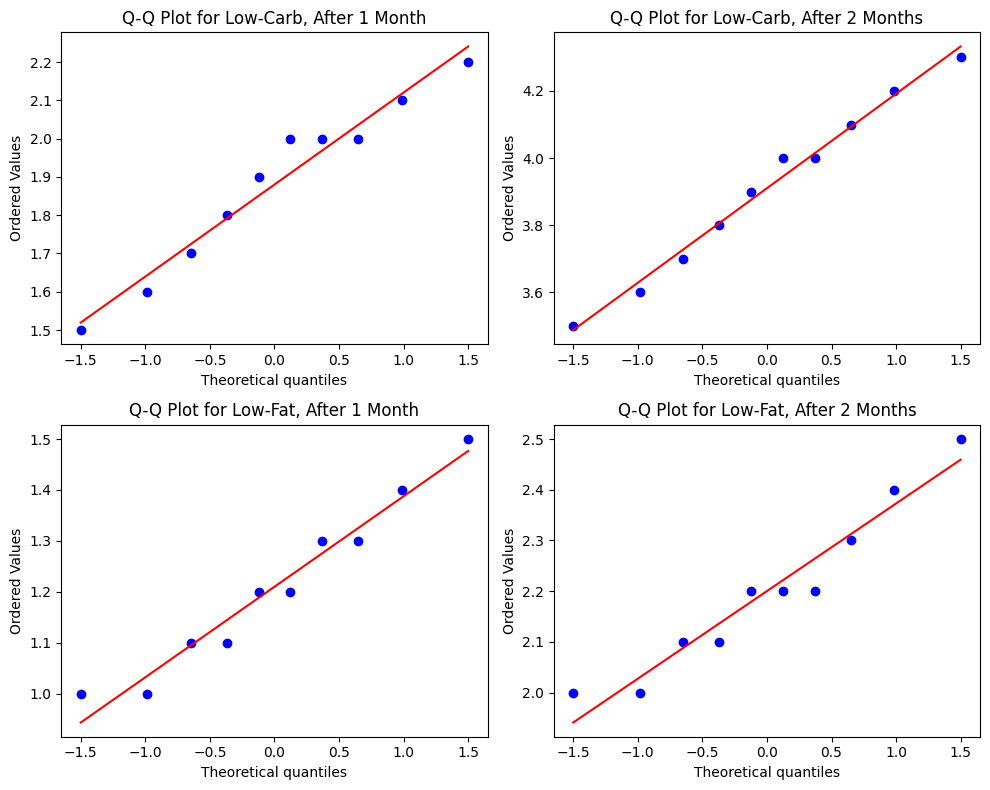

In [56]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

stats.probplot(low_carb_month_1, dist="norm", plot=axes[0, 0])
axes[0, 0].set_title("Q-Q Plot for Low-Carb, After 1 Month")


stats.probplot(low_carb_month_2, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title("Q-Q Plot for Low-Carb, After 2 Months")


stats.probplot(low_fat_month_1, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title("Q-Q Plot for Low-Fat, After 1 Month")


stats.probplot(low_fat_month_2, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title("Q-Q Plot for Low-Fat, After 2 Months")

plt.tight_layout()
plt.show()

In [62]:
df_melt = pd.melt(df, id_vars=['Participant', 'Diet Type'],
                  value_vars=['Baseline', 'After 1 month', 'After 2 months'],
                  var_name='Time', value_name='Weight_Loss')
aov = pg.rm_anova(dv='Weight_Loss', within='Time', subject='Participant', data=df_melt, detailed=True)
mauchly = pg.sphericity(df_melt, dv='Weight_Loss', within='Time', subject='Participant')

print("Repeated Measures ANOVA:")
print(aov)

print("\nMauchly’s Test of Sphericity:")
print(mauchly)


Repeated Measures ANOVA:
  Source         SS  DF         MS           F         p-unc     p-GG-corr  \
0   Time  93.334333   2  46.667167  221.512137  1.134267e-21  2.071801e-12   
1  Error   8.005667  38   0.210675         NaN           NaN           NaN   

        ng2       eps sphericity   W-spher       p-spher  
0  0.835182  0.524741      False  0.094299  5.896243e-10  
1       NaN       NaN        NaN       NaN           NaN  

Mauchly’s Test of Sphericity:
SpherResults(spher=False, W=0.09429927870847703, chi2=42.5030712889439, dof=2, pval=5.896242510895627e-10)


In [68]:
low_carb = df[['Baseline', 'After 1 month', 'After 2 months']].iloc[0:10].values.flatten()
low_fat = df[['Baseline', 'After 1 month', 'After 2 months']].iloc[10:20].values.flatten()

stat, p_value = stats.levene(low_carb, low_fat)

print(f"Levene’s Test for Homogeneity of Variance: W = {stat:.4f}, p = {p_value:.4e}")

Levene’s Test for Homogeneity of Variance: W = 10.4740, p = 2.0026e-03


In [69]:
if p_value < 0.05:
    print("The variances are significantly different (p < 0.05). The assumption of homogeneity of variance is violated.")
else:
    print("The variances are approximately equal (p > 0.05). The assumption of homogeneity of variance is met.")

The variances are significantly different (p < 0.05). The assumption of homogeneity of variance is violated.


In [70]:
duplicates = df[df.duplicated(['Participant'], keep=False)]
if duplicates.empty:
    print("All participants are independent (no duplicates found).")
else:
    print("Duplicate participants found:\n", duplicates)

All participants are independent (no duplicates found).


<ipython-input-72-9ad27c41f22a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diet Type', data=df, palette='Set2')


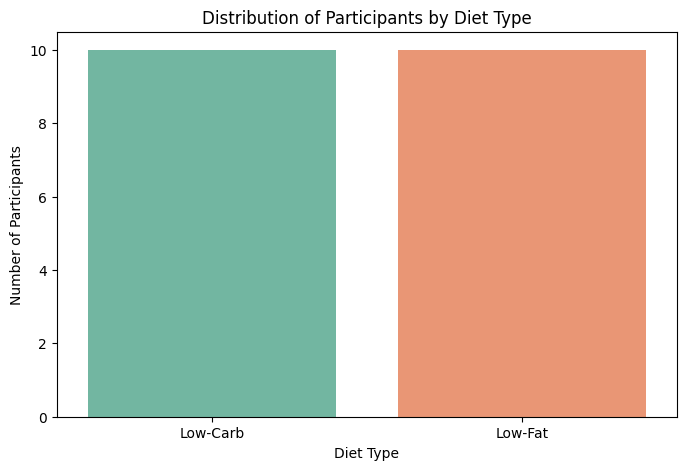

In [72]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Diet Type', data=df, palette='Set2')
plt.title('Distribution of Participants by Diet Type')
plt.xlabel('Diet Type')
plt.ylabel('Number of Participants')
plt.show()

In [74]:
df_melt = df.melt(id_vars=['Participant', 'Diet Type'],
                  value_vars=['Baseline', 'After 1 month', 'After 2 months'],
                  var_name='Time', value_name='Weight_Loss')


aov = pg.mixed_anova(dv='Weight_Loss', within='Time', between='Diet Type', subject='Participant', data=df_melt)

print(aov)

        Source         SS  DF1  DF2         MS            F         p-unc  \
0    Diet Type   9.440667    1   18   9.440667   174.707334  1.048878e-10   
1         Time  93.334333    2   36  46.667167  2889.939220  1.779792e-40   
2  Interaction   7.424333    2   36   3.712167   229.881881  3.151367e-21   

      p-GG-corr       np2       eps sphericity   W-spher       p-spher  
0           NaN  0.906594       NaN        NaN       NaN           NaN  
1  2.071801e-12  0.993810  0.524741      False  0.094299  5.896243e-10  
2           NaN  0.927385       NaN        NaN       NaN           NaN  


In [76]:
diet_effect = aov.loc[aov['Source'] == 'Diet Type']
print("\nMain Effect of Diet Type:\n", diet_effect)


time_effect = aov.loc[aov['Source'] == 'Time']
print("\nMain Effect of Time:\n", time_effect)


interaction_effect = aov.loc[aov['Source'] == 'Diet Type:Time']
print("\nInteraction Effect (Diet Type x Time):\n", interaction_effect)


Main Effect of Diet Type:
       Source        SS  DF1  DF2        MS           F         p-unc  \
0  Diet Type  9.440667    1   18  9.440667  174.707334  1.048878e-10   

   p-GG-corr       np2  eps sphericity  W-spher  p-spher  
0        NaN  0.906594  NaN        NaN      NaN      NaN  

Main Effect of Time:
   Source         SS  DF1  DF2         MS           F         p-unc  \
1   Time  93.334333    2   36  46.667167  2889.93922  1.779792e-40   

      p-GG-corr      np2       eps sphericity   W-spher       p-spher  
1  2.071801e-12  0.99381  0.524741      False  0.094299  5.896243e-10  

Interaction Effect (Diet Type x Time):
 Empty DataFrame
Columns: [Source, SS, DF1, DF2, MS, F, p-unc, p-GG-corr, np2, eps, sphericity, W-spher, p-spher]
Index: []
